# Lab 5: Insurance Costs
---

## Importing Dependencies

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score


from plotnine import *

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Part One: Data Exploration
---

## https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

## 1. Read in the dataset, and display some summaries of the data.

In [2]:
data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

In [3]:
data.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [4]:
data.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [5]:
data.region.unique()

array(['southwest', 'northwest', 'southeast', 'northeast'], dtype=object)

In [6]:
data.age.unique()

array([19, 33, 32, 31, 60, 25, 62, 56, 27, 23, 30, 22, 18, 26, 24, 55, 28,
       36, 20, 57, 21, 41, 45, 38, 29, 58, 59, 48, 42, 44, 63, 39, 51, 64,
       46, 53, 54, 50, 52, 49, 34, 61, 40, 47, 43, 37, 35], dtype=int64)

## 2. Fix any concerns you have about the data.

In [7]:
data = data.dropna()

In [8]:
# Creating a new column from the BMI to show low, normal and high bmi
data['bmi_cat'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, float('inf')], labels=['low_bmi', 'normal_bmi', 'high_bmi'])

In [9]:
# Creating a new column from the age variable to show, young adults, middle aged adults, and senior adults
bins = [0, 30, 49, float('inf')]
labels = ['Young_Adults', 'Middle_Aged_Adults', 'Older_Aged_Adults']
data['age_cat'] = pd.cut(data['age'], bins=bins, labels=labels)

In [10]:
# columns to encode
columns_to_encode = ['age_cat', 'bmi_cat', 'region', 'smoker', 'sex']

# getting the dummies
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

# Adding the one-hot encoded columns to the original DataFrame
data[encoded_data.columns] = encoded_data

In [11]:
data[0:1]

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,female,27.9,yes,southwest,16884.924,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,0,1,1,0


## 3. Three plots comparing the response variable (charges) to one of the predictor variables.

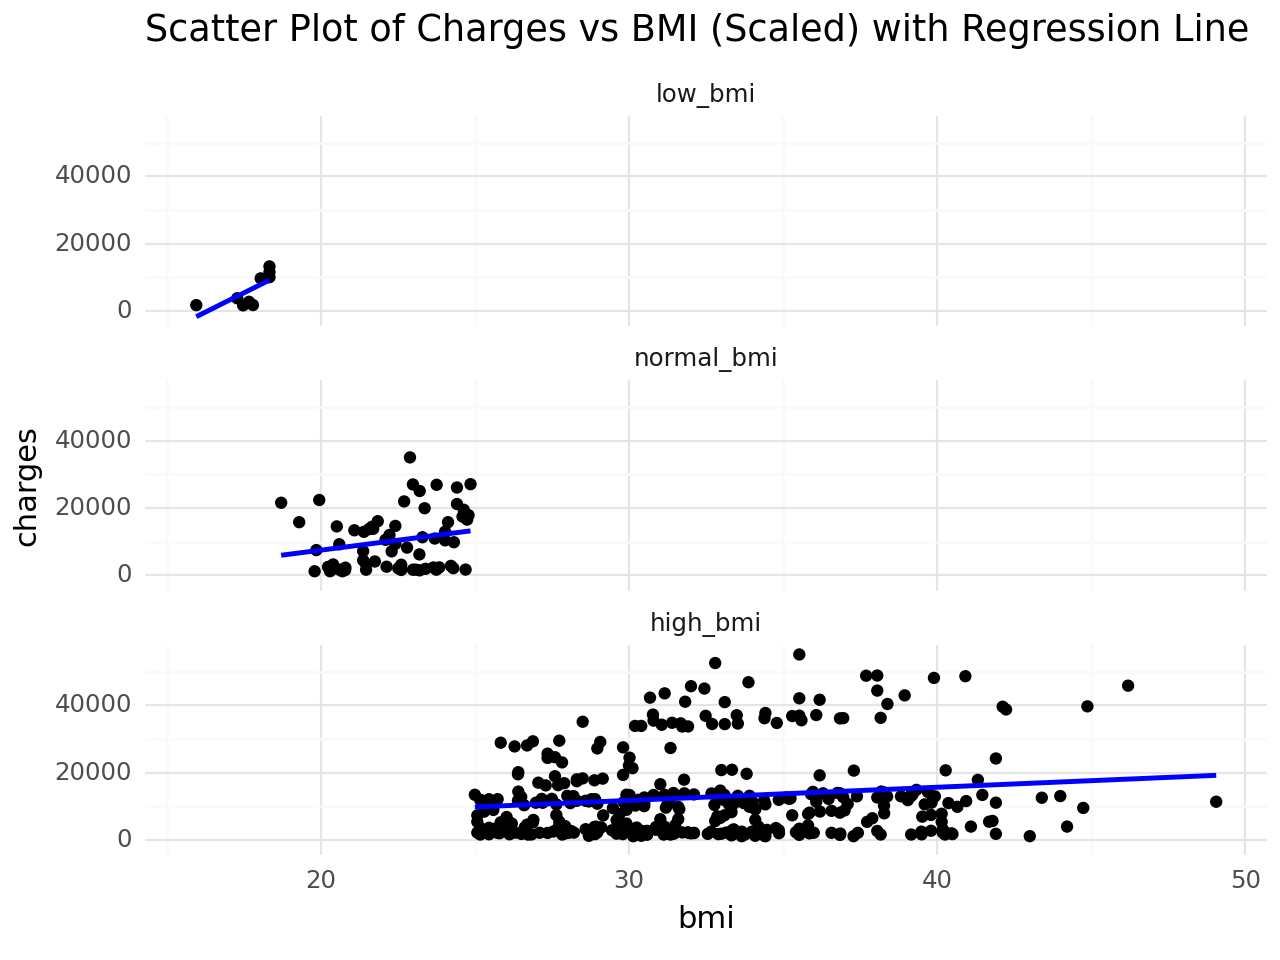

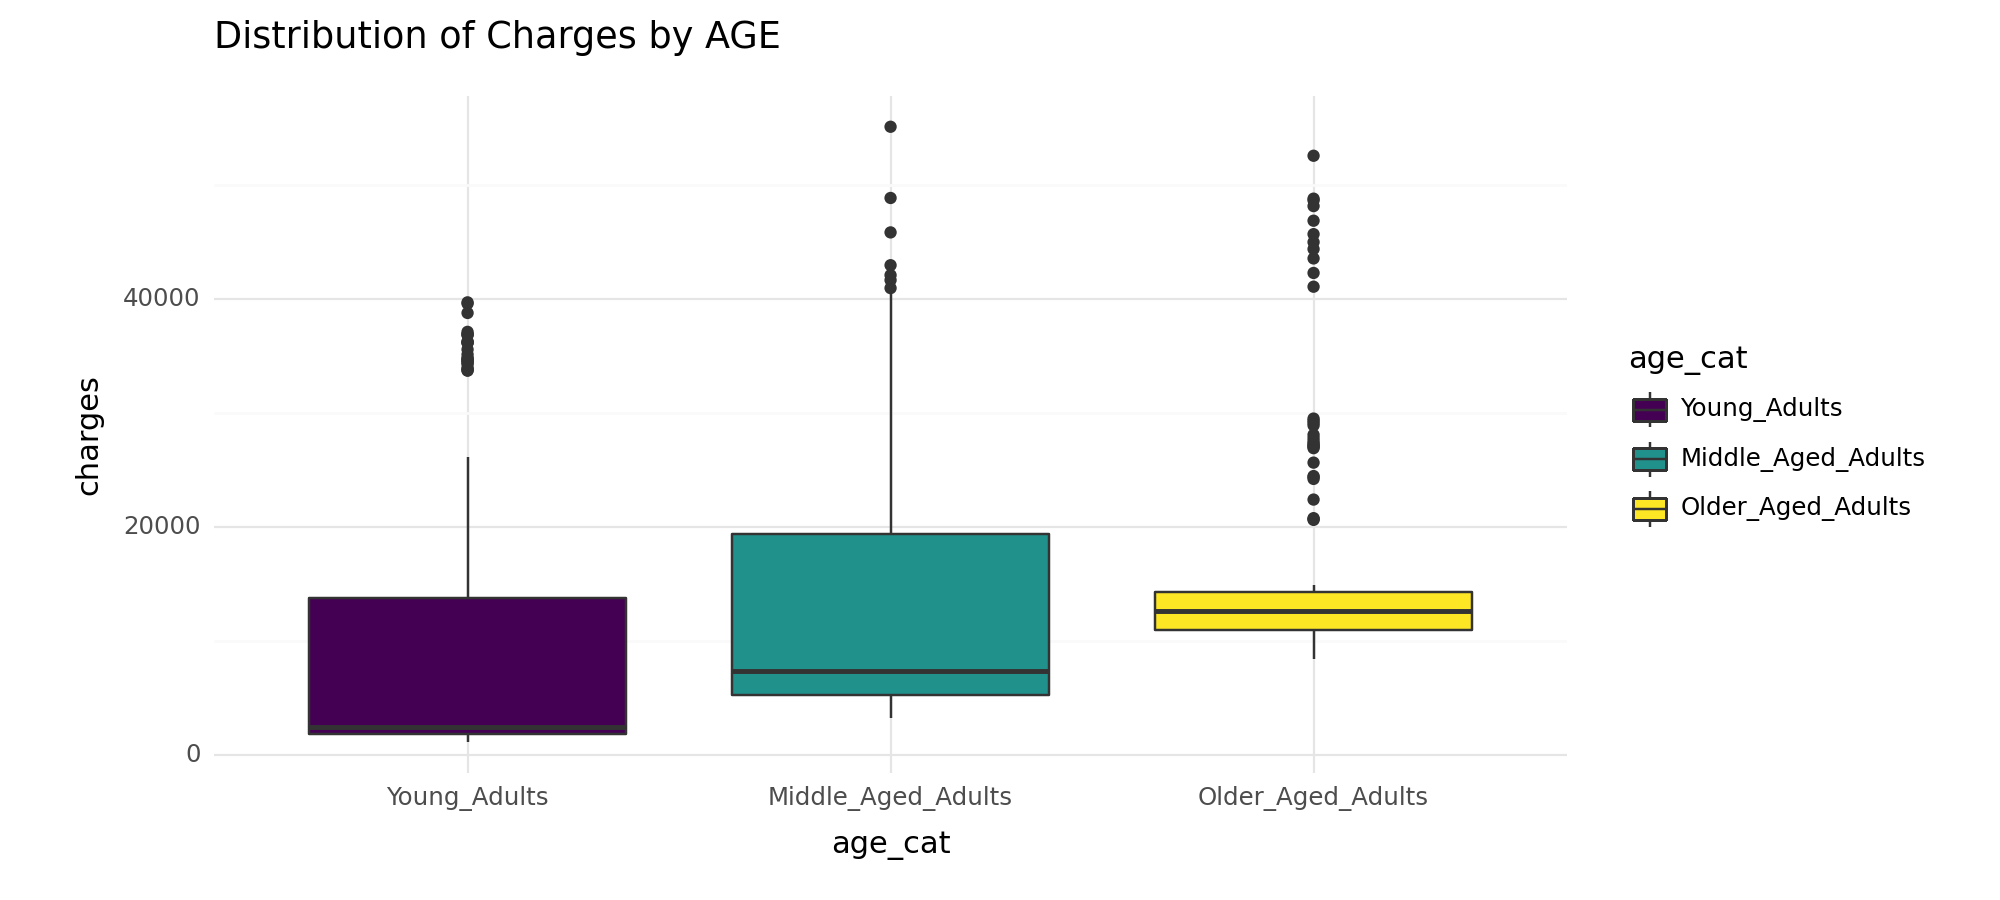

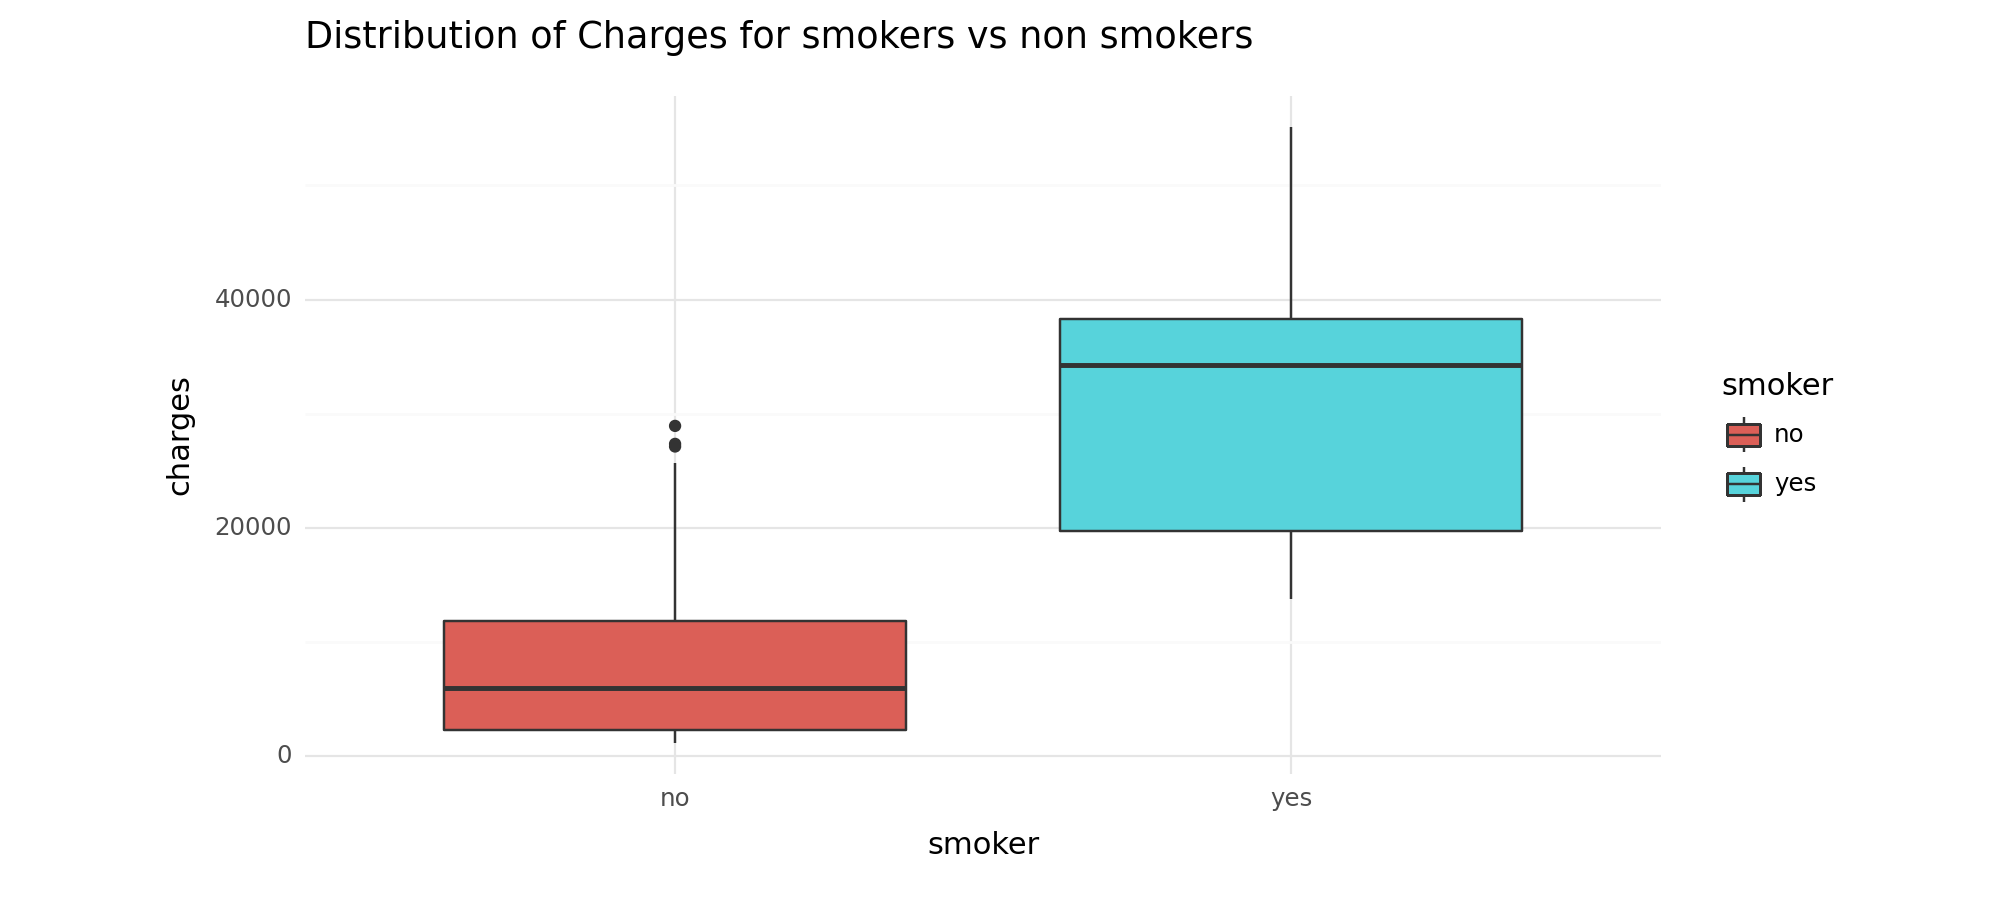

In [12]:
# Plot for charges and bmi
scatterplot = (ggplot(data, aes(x='bmi', y='charges'))
 + geom_point()
 + geom_smooth(method='lm', color='blue', se=False)
 + labs(title='Scatter Plot of Charges vs BMI (Scaled) with Regression Line')
 + facet_wrap('~bmi_cat', ncol=1)
 + theme_minimal()
)

# plot for charges and age
box_plot2 = (ggplot(data, aes(x='age_cat', fill='age_cat'))
+ geom_boxplot(aes(y='charges'))
+ labs(title='Distribution of Charges by AGE')
+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))             
)

# plot for charges and smoker
box_plot3 = (ggplot(data, aes(x='smoker', fill='smoker'))
+ geom_boxplot(aes(y='charges'))
+ labs(title='Distribution of Charges for smokers vs non smokers')
+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))             
)

print(scatterplot)
print(box_plot2)
print(box_plot3)


# Part Two: Simple Linear Models
---

## 1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

### Model 1
---

In [13]:
# Making the X and y variables
X = data[['age']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model1 = LinearRegression()

# Fit the model on the training data
model1_fit = model1.fit(X_train, y_train)

# Predictions with the model
y_pred_model1 = model1_fit.predict(X_test)

# getting the metrics for the model
mse_model1 = mean_squared_error(y_test, y_pred_model1)
print(f"Mean Squared Error (MSE): {mse_model1}")

# getting the r^2
r2_model1 = r2_score(y_test, y_pred_model1)
print(f"R-squared (R2): {r2_model1}")

# getting the model coefficients
coef_model1 = model1_fit.coef_[0]
print(coef_model1)

Mean Squared Error (MSE): 113710271.05923884
R-squared (R2): 0.08131322860593015
237.45586635692587


In [14]:
print(f"With an R-squared of {r2_model1:.2f} this model is perhaps not the best at predicting charges.")

With an R-squared of 0.08 this model is perhaps not the best at predicting charges.


In [15]:
print(f"For every one unit increase in age, charges increase by ${coef_model1:.2f} on average.")

For every one unit increase in age, charges increase by $237.46 on average.


For every one unit increase in age, charges increase by $237.46 on average.

## 2. Make a model that also incorporates the variable sex. Report your results.

### Model 2
---

In [16]:
# Making the X and y variables
X = data[['age', 'sex_male']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model2 = LinearRegression()

# Fit the model on the training data
model2_fit = model2.fit(X_train, y_train)

# Predictions with the model
y_pred = model2_fit.predict(X_test)

# getting the metrics for the model
mse_model2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_model2}")

# getting the r^2
r2_model2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2_model2}")

# getting the model coefficients
coef_model2 = model2_fit.coef_
print(coef_model2)

Mean Squared Error (MSE): 115839694.3021982
R-squared (R2): 0.06410921576010131
[ 237.84447628 1533.36027941]


## 3. Now make a model that does not include sex, but does include smoker. Report your results.

### Model 3
---

In [17]:
# Making the X and y variables
X = data[['age', 'smoker_yes']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model3 = LinearRegression()

# Fit the model on the training data
model3_fit = model3.fit(X_train, y_train)

# Predictions with the model
y_pred = model3_fit.predict(X_test)

# getting the metrics for the model
mse_model3 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_model3}")

# getting the r^2
r2_model3 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2_model3}")

# getting the model coefficients
coef_model3 = model3_fit.coef_
print(coef_model3)

Mean Squared Error (MSE): 38741815.81525928
R-squared (R2): 0.6869975477349591
[  251.34454799 24682.6873566 ]


## 4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [18]:
print(r2_model2)
print(r2_model3)

0.06410921576010131
0.6869975477349591


In [19]:
print(mse_model2)
print(mse_model3)

115839694.3021982
38741815.81525928


Model 3 outperforms model 2 in both MSE and R-squared metrics with a lower MSE and higher R-squared.

# Part Three: Multiple Linear Models
---

## Now let’s consider including multiple quantitative predictors.

## 1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

### Model 4
---

In [20]:
# Making the X and y variables
X = data[['age', 'bmi']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model4 = LinearRegression()

# Fit the model on the training data
model4_fit = model4.fit(X_train, y_train)

# Predictions with the model
y_pred = model4_fit.predict(X_test)

# getting the metrics for the model
mse_model4 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_model4}")

# getting the r^2
r2_model4 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2_model4}")

# getting the model coefficients
model4_coef = model4_fit.coef_
print(model4_coef)

Mean Squared Error (MSE): 108679185.46735105
R-squared (R2): 0.12196031998970436
[225.19610816 246.58859575]


In [21]:
print(mse_model1)
print(mse_model4)

113710271.05923884
108679185.46735105


In [22]:
print(r2_model1)
print(r2_model4)

0.08131322860593015
0.12196031998970436


Model 1 has a slighly lower MSE and the R^2 here cannot be used to compare because the two models have different number of variables. Although it is higher for model 4. 

## 2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

### Model 5
---

In [23]:
data['age^2'] = data['age'] ** 2

In [24]:
# Making the X and y variables
X = data[['age', 'age^2']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model5 = LinearRegression()

# Fit the model on the training data
model5_fit = model5.fit(X_train, y_train)

# Predictions with the model
y_pred = model5_fit.predict(X_test)

# getting the metrics for the model
mse_model5 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_model5}")

# getting the r^2
r2_model5 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2_model5}")

# getting the model coefficients
model5_coef = model5_fit.coef_
print(model5_coef)

Mean Squared Error (MSE): 114961185.15285146
R-squared (R2): 0.07120685721795217
[485.27960636  -3.12114504]


In [25]:
print(mse_model1)
print(mse_model5)

113710271.05923884
114961185.15285146


In [26]:
print(r2_model1)
print(r2_model5)

0.08131322860593015
0.07120685721795217


Model 4 has a slightly higher MSE and a lower R^2, so it's performing a little worse.

## 3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

### Model 6
---

In [27]:
# Making the X and y variables
X = data[['age']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

#renaming processess
poly = PolynomialFeatures(degree=4)

#model spec
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model6_pipeline = Pipeline([
    ('polynomial_features', poly),
    ('ols', lr)])

# Fitting the model on the training dataset
model6_fit = model6_pipeline.fit(X_train, y_train)

# Predicting with model
y_pred = model6_pipeline.predict(X_test)
#print(two_deg_lr)

# getting the metrics for the model
mse_model6 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_model6}")

# getting the r^2
r2_model6 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2_model6}")

# getting the model coefficients
model6_coef = model6_fit.named_steps['ols'].coef_
print(model6_coef)

Mean Squared Error (MSE): 117469271.06730624
R-squared (R2): 0.05094355708098364
[ 0.00000000e+00 -1.20743275e+04  5.30516285e+02 -9.41946887e+00
  5.88620788e-02]


In [28]:
print(mse_model1)
print(mse_model6)

113710271.05923884
117469271.06730624


In [29]:
print(r2_model1)
print(r2_model6)

0.08131322860593015
0.05094355708098364


Model 1 is holding as the better model with a lower error and higher R-squared.

## 4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

### Model 7
---

In [30]:
# Making the X and y variables
X = data[['age']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

#renaming processess
poly = PolynomialFeatures(degree=12)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model7_pipeline = Pipeline([
    ('polynomial_features', poly),
    ('ols', lr)
])

# Fitting the model on the training dataset
model7_fit = model7_pipeline.fit(X_train, y_train)

# Predicting with model
y_pred_model7 = model7_pipeline.predict(X_test)
#print(two_deg_lr)

# getting the metrics for the model
mse_model7 = mean_squared_error(y_test, y_pred_model7)
print(f"Mean Squared Error (MSE): {mse_model7}")

# getting the r^2
r2_model7 = r2_score(y_test, y_pred_model7)
print(f"R-squared (R2): {r2_model7}")

# getting the model coefficients
model7_coef = model7_fit.named_steps['ols'].coef_
print(model7_coef)

Mean Squared Error (MSE): 117439801.1401413
R-squared (R2): 0.05118165019243415
[ 0.00000000e+00  1.29403780e-05 -3.70746138e-08 -8.28827512e-07
 -1.37201792e-05 -1.63669412e-04 -1.09224393e-03  1.37535380e-04
 -7.03339162e-06  1.89027058e-07 -2.82748791e-09  2.23665778e-11
 -7.31876534e-14]


In [31]:
print(mse_model1)
print(mse_model7)

113710271.05923884
117439801.1401413


In [32]:
print(r2_model1)
print(r2_model7)

0.08131322860593015
0.05118165019243415


Model 1 is still holding as the better model with a lower error and higher R-squared.

## 5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

In [33]:
#showcasing the all the models MSE's to pick the lowest one
r2_values = [r2_model1, r2_model2, r2_model3, r2_model4, r2_model5, r2_model6, r2_model7]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']
r2_df = pd.DataFrame({'Model': model_names, 'r2': r2_values})

r2_df = r2_df.sort_values(by='r2')

r2_df

,Model,r2
5,Model 6,0.050944
6,Model 7,0.051182
1,Model 2,0.064109
4,Model 5,0.071207
0,Model 1,0.081313
3,Model 4,0.121960
2,Model 3,0.686998


In [34]:
#showcasing the all the models MSE's to pick the lowest one
mse_values = [mse_model1, mse_model2, mse_model3, mse_model4, mse_model5, mse_model6, mse_model7]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']
mse_df = pd.DataFrame({'Model': model_names, 'MSE': mse_values})

mse_df = mse_df.sort_values(by='MSE')

mse_df

,Model,MSE
2,Model 3,3.874182e+07
3,Model 4,1.086792e+08
0,Model 1,1.137103e+08
4,Model 5,1.149612e+08
1,Model 2,1.158397e+08
6,Model 7,1.174398e+08
5,Model 6,1.174693e+08


According to r^2 and MSE, it seems that model 3 is the victor so far from all the models with the lowest MSE and the highest r^2.

## 6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

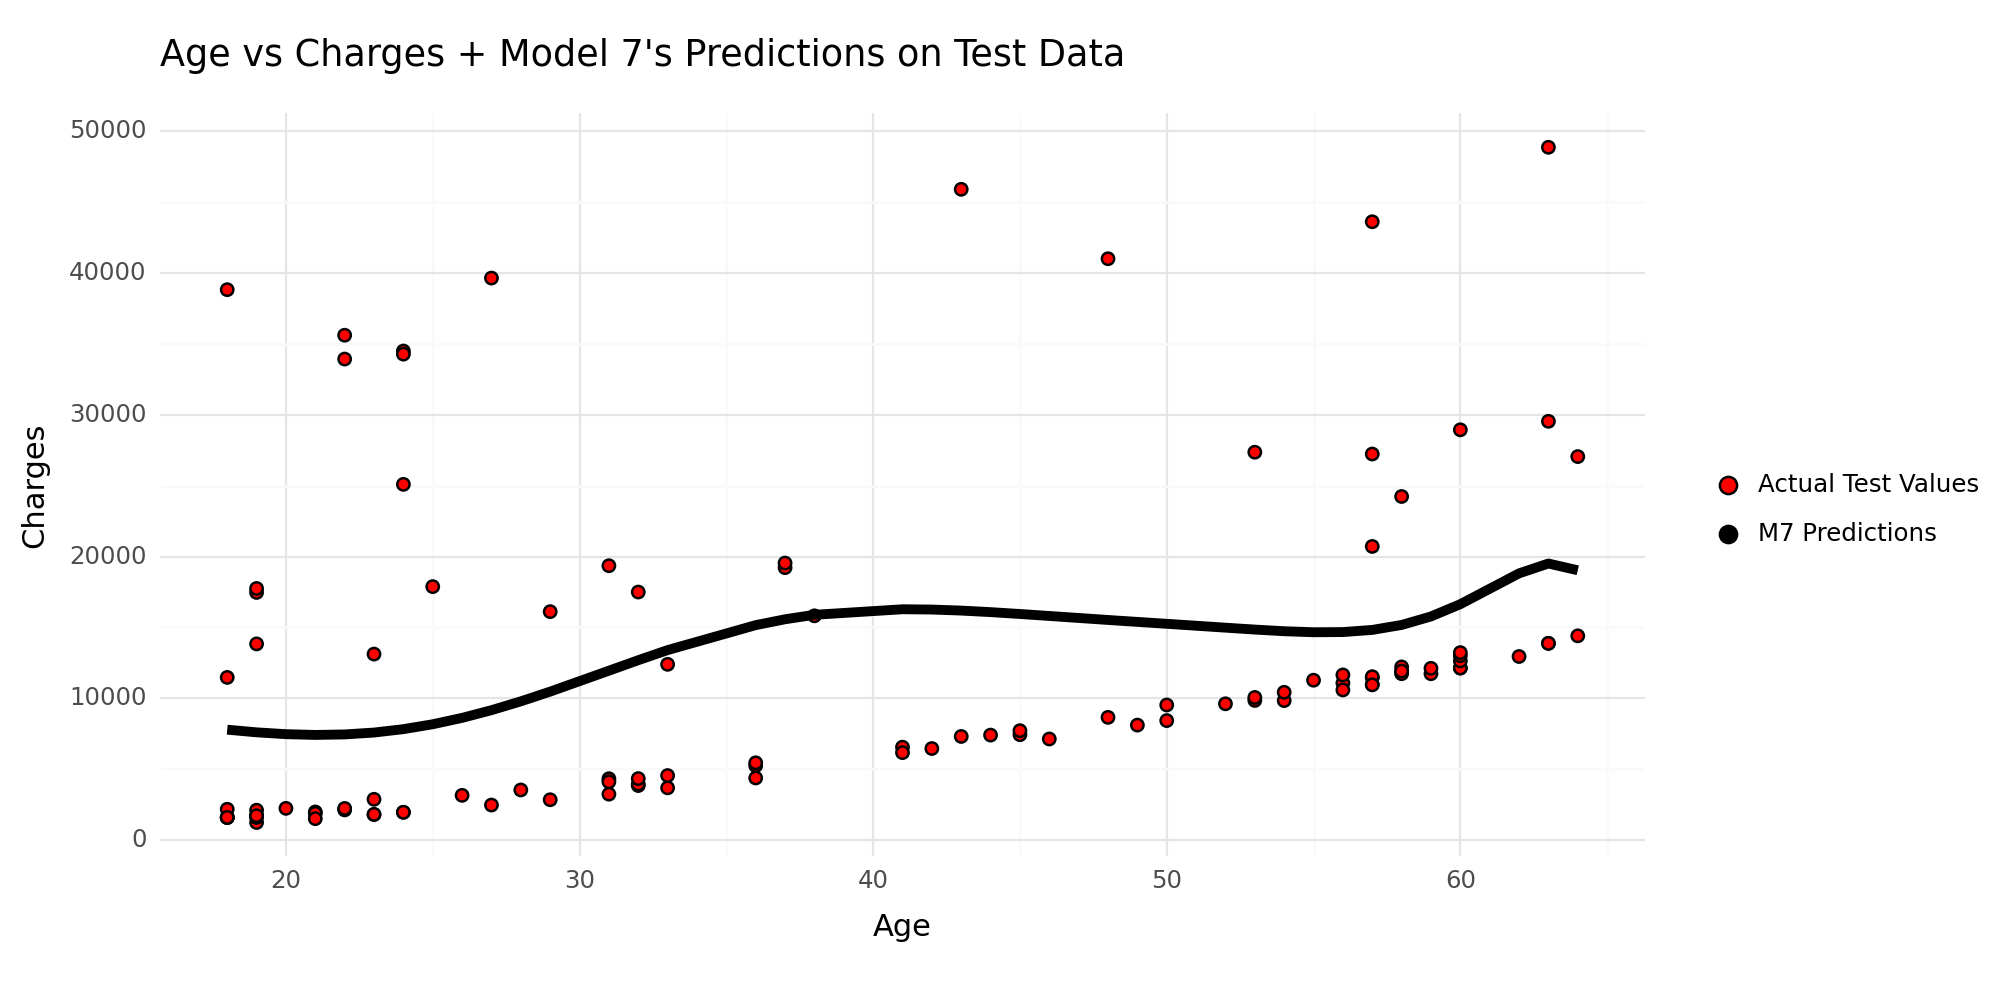

<Figure Size: (1000 x 500)>

In [35]:
#creating data frame for plotting
full = pd.DataFrame({'X_test': X_test['age'], 'y_test': y_test,
                     'y_pred_model7': y_pred_model7})

#plot with all the models' predictions and the actual values
(ggplot(full, aes(x="X_test"))

+ geom_point(aes(y='y_test', fill="'Actual Test Values'"), size=2)  #Actual 'y_test' data points
+ geom_line(aes(y='y_pred_model7', fill="'M7 Predictions'"), size=2)  #'OLS Regression' data points
+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 5))
+ labs(x='Age', y='Charges', title='Age vs Charges + Model 7\'s Predictions on Test Data')
+ scale_fill_manual(values={'Actual Test Values': 'red', 'M7 Predictions': 'black'})
+ guides(fill=guide_legend(title="", override_aes={"size": 3})))

# Part Four: New data
---

## Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

## Consider the following possible models:

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

## 1. Only age as a predictor.


### Model 8
---

In [36]:
data2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

In [37]:
#Cleaning and transforming as I did with the first dataset
data2 = data2.dropna()

# Creating a new column from the BMI to show low, normal and high bmi
data2['bmi_cat'] = pd.cut(data2['bmi'], bins=[0, 18.5, 24.9, float('inf')], labels=['low_bmi', 'normal_bmi', 'high_bmi'])

# Creating a new column from the age variable to show, young adults, middle aged adults, and senior adults
bins = [0, 30, 49, float('inf')]
labels = ['Young_Adults', 'Middle_Aged_Adults', 'Older_Aged_Adults']
data2['age_cat'] = pd.cut(data2['age'], bins=bins, labels=labels)

# getting the dummies
columns_to_encode = ['age_cat', 'bmi_cat', 'region', 'smoker', 'sex']
encoded_data2 = pd.get_dummies(data2, columns=columns_to_encode)

# Adding the one-hot encoded columns to the original DataFrame
data2[encoded_data2.columns] = encoded_data2

In [38]:
data2[0:1]

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,23,male,34.4,no,southwest,1826.843,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,0,1


In [39]:
# Making the X and y variables
X = data[['age']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model8 = LinearRegression()

# Fit the model on the training data
model8_fit = model8.fit(X_train, y_train)

# Making the X and y variables for data 2
X_2 = data[['age']]
y_2 = data['charges']

# Predictions with the model
y_pred_model8 = model8_fit.predict(X_2)

# getting the metrics for the model
mse_model8 = mean_squared_error(y_2, y_pred_model8)
print(f"Mean Squared Error (MSE): {mse_model8}")

# getting the r^2
r2_model8 = r2_score(y_2, y_pred_model8)
print(f"R-squared (R2): {r2_model8}")

# getting the model coefficients
model8_coef = model8_fit.coef_
print(model8_coef)

Mean Squared Error (MSE): 126763000.29579417
R-squared (R2): 0.09921241037124517
[237.45586636]


## 2. age and bmi as a predictor

### Model 9
---

In [40]:
# Making the X and y variables
X = data[['age', 'bmi']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model9 = LinearRegression()

# Fit the model on the training data
model9_fit = model9.fit(X_train, y_train)

# Making the X and y variables for data 2
X_2 = data[['age', 'bmi']]
y_2 = data['charges']

# Predictions with the model
y_pred_model9 = model9_fit.predict(X_2)

# getting the metrics for the model
mse_model9 = mean_squared_error(y_2, y_pred_model9)
print(f"Mean Squared Error (MSE): {mse_model9}")

# getting the r^2
r2_model9 = r2_score(y_2, y_pred_model9)
print(f"R-squared (R2): {r2_model9}")

# getting the model coefficients
model9_coef = model9_fit.coef_
print(model9_coef)

Mean Squared Error (MSE): 123858496.51040737
R-squared (R2): 0.11985203674330236
[225.19610816 246.58859575]


## 3. age, bmi, and smoker as predictors (no interaction terms)

### Model 10
---

In [41]:
# Making the X and y variables
X = data[['age', 'bmi', 'smoker_yes']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model10 = LinearRegression()

# Fit the model on the training data
model10_fit = model10.fit(X_train, y_train)

X_2 = data[['age', 'bmi', 'smoker_yes']]
y_2 = data['charges']

# Predictions with the model
y_pred_model10 = model10_fit.predict(X_2)

# getting the metrics for the model
mse_model10 = mean_squared_error(y_2, y_pred_model10)
print(f"Mean Squared Error (MSE): {mse_model10}")

# getting the r^2
r2_model10 = r2_score(y_2, y_pred_model10)
print(f"R-squared (R2): {r2_model10}")

# getting the model coefficients
model10_coef = model10_fit.coef_
print(model10_coef)

Mean Squared Error (MSE): 30928335.509012997
R-squared (R2): 0.7802208788890775
[  239.14136555   245.4214912  24680.11095434]


## 4. age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)


### Model 11
---

In [42]:
#creating interaction terms data
data['age*smoker_yes'] = data['age'] * data['smoker_yes']
data['bmi*smoker_yes'] = data['bmi'] * data['smoker_yes']

##creating interaction terms data2
data2['age*smoker_yes'] = data2['age'] * data2['smoker_yes']
data2['bmi*smoker_yes'] = data2['bmi'] * data2['smoker_yes']

In [43]:
# Making the X and y variables
X = data[['age', 'bmi', 'age*smoker_yes', 'bmi*smoker_yes']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model11 = LinearRegression()

# Fit the model on the training data
model11_fit = model11.fit(X_train, y_train)

# Making the X and y variables
X_2 = data2[['age', 'bmi', 'age*smoker_yes', 'bmi*smoker_yes']]
y_2 = data2['charges']

# Predictions with the model
y_pred_model11 = model11_fit.predict(X_2)

# getting the metrics for the model
mse_model11 = mean_squared_error(y_2, y_pred_model11)
print(f"Mean Squared Error (MSE): {mse_model11}")

# getting the r^2
r2_model11 = r2_score(y_2, y_pred_model11)
print(f"R-squared (R2): {r2_model11}")

# getting the model coefficients
model11_coef = model11_fit.coef_
print(model11_coef)

Mean Squared Error (MSE): 24682731.319525965
R-squared (R2): 0.8408077536805659
[ 269.69323163   78.52754404 -111.86110778  957.67099554]


## 5. age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)


### Model 12
---

In [44]:
# Making the X and y variables
X = data[['age', 'bmi', 'smoker_yes', 'age*smoker_yes', 'bmi*smoker_yes']]
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

# Create a linear regression model
model12 = LinearRegression()

# Fit the model on the training data
model12_fit = model12.fit(X_train, y_train)

X_2 = data2[['age', 'bmi', 'smoker_yes', 'age*smoker_yes', 'bmi*smoker_yes']]
y_2 = data2['charges']

# Predictions with the model
y_pred_model12 = model12_fit.predict(X_2)

# getting the metrics for the model
mse_model12 = mean_squared_error(y_2, y_pred_model12)
print(f"Mean Squared Error (MSE): {mse_model12}")

# getting the r^2
r2_model12 = r2_score(y_2, y_pred_model12)
print(f"R-squared (R2): {r2_model12}")

# getting the model coefficients
model12_coef = model12_fit.coef_
print(model12_coef)

Mean Squared Error (MSE): 21469965.966349043
R-squared (R2): 0.8615286101712287
[ 2.58148764e+02 -1.97047609e+01 -2.37104024e+04 -1.97723282e+01
  1.59712157e+03]


## 6. MSE Conclusions

In [45]:
#showcasing the all the models MSE's to pick the lowest one
mse_values = [mse_model1, mse_model2, mse_model3, mse_model4, mse_model5, mse_model6, mse_model7, mse_model8, mse_model9, mse_model10, mse_model11, mse_model12]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12']
mse_df = pd.DataFrame({'Model': model_names, 'MSE': mse_values})

mse_df = mse_df.sort_values(by='MSE')

mse_df

,Model,MSE
11,Model 12,2.146997e+07
10,Model 11,2.468273e+07
9,Model 10,3.092834e+07
2,Model 3,3.874182e+07
3,Model 4,1.086792e+08
0,Model 1,1.137103e+08
4,Model 5,1.149612e+08
1,Model 2,1.158397e+08
6,Model 7,1.174398e+08
5,Model 6,1.174693e+08


## 7. Plot showing the residuals of chosen model

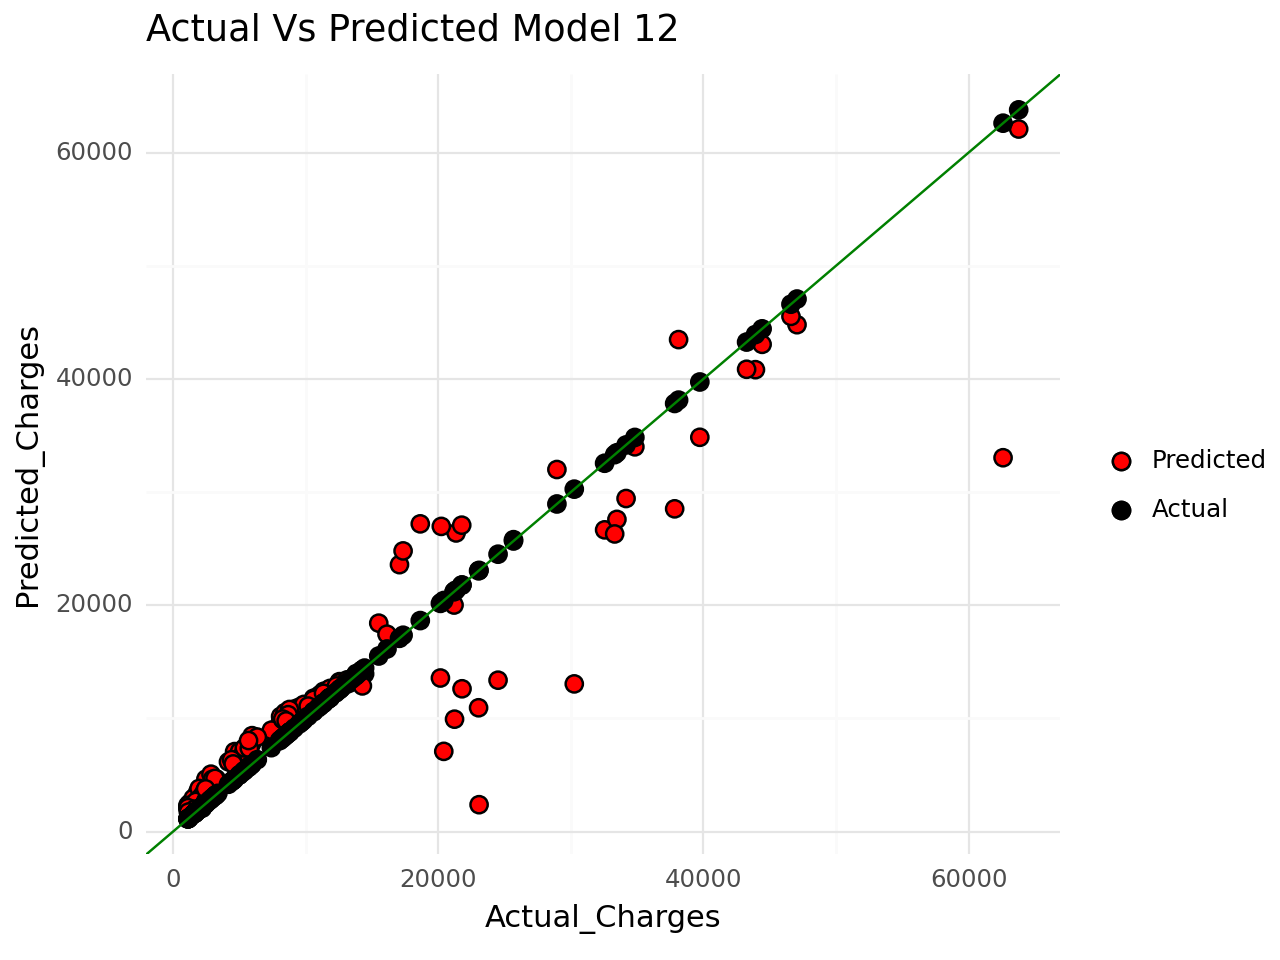

<Figure Size: (640 x 480)>

In [46]:
(ggplot(aes(x="y_2"))
 + geom_point(aes(y="y_pred_model12", fill="'Predicted'"), size=3)
 + geom_point(aes(y="y_2", fill="'Actual'"), size=3)
 + geom_abline(intercept=0, slope=1, color="green")
 + theme_minimal()
 + labs(x='Actual_Charges', y='Predicted_Charges', title='Actual Vs Predicted Model 12')
 
+ scale_fill_manual(values={'Predicted': 'red', 'Actual': 'black'})
+ guides(fill=guide_legend(title="", override_aes={"size": 3})
))

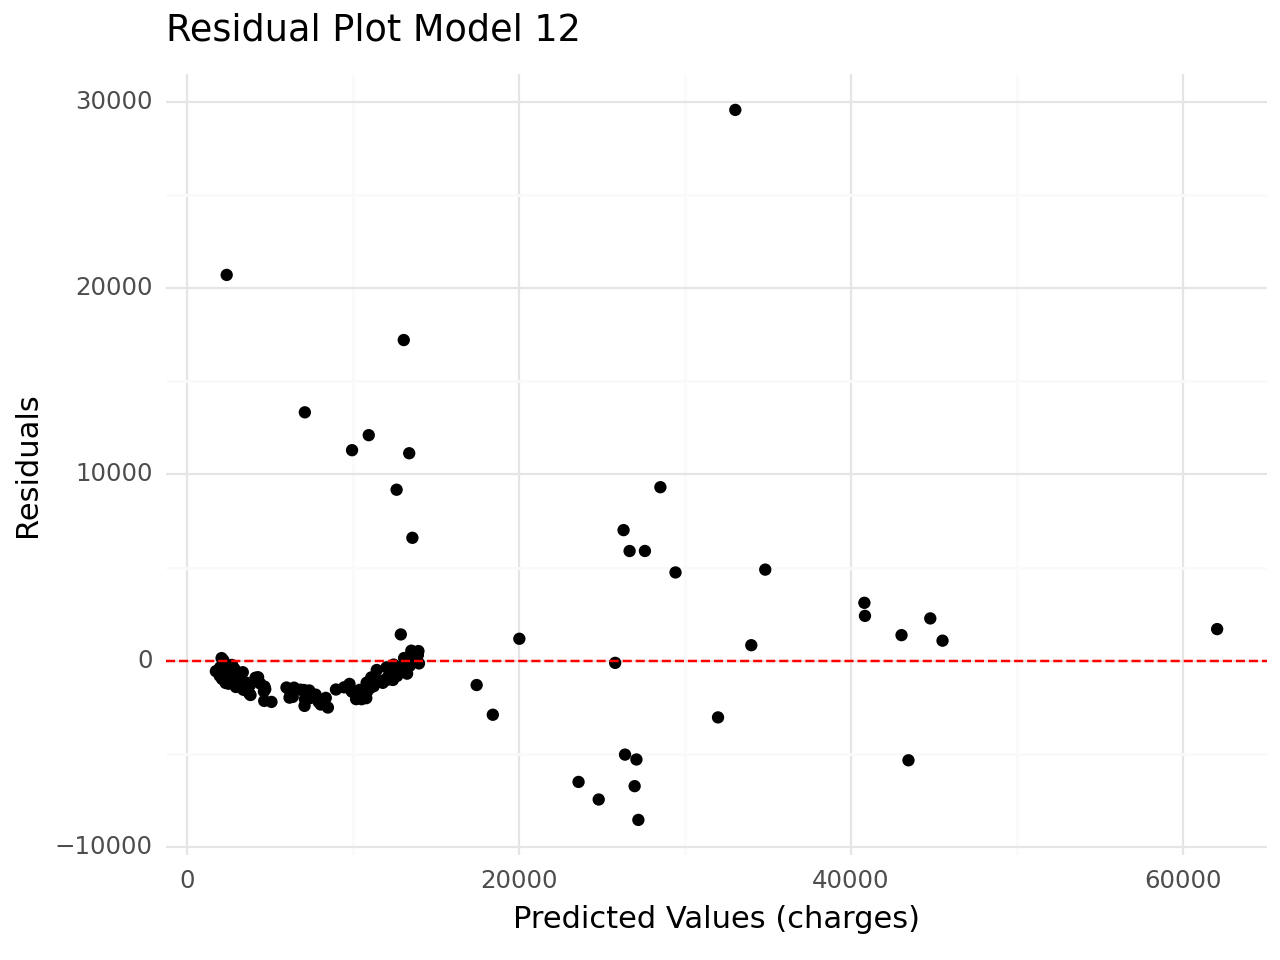

<Figure Size: (640 x 480)>

In [47]:
# Calculate residuals
residuals = y_2 - y_pred_model12

# Create a DataFrame with residuals
residual_data = pd.DataFrame({'Predicted Values (charges)': y_pred_model12, 'Residuals': residuals})

# Create the residual plot using ggplot
(ggplot(residual_data, aes(x="Predicted Values (charges)", y="Residuals"))
+ geom_point()
+ geom_hline(yintercept=0, linetype="dashed", color="red")
+ labs(x="Predicted Values (charges)", y="Residuals")
+ theme_minimal()
+ ggtitle("Residual Plot Model 12")
)

# Part Five: Full Exploration
---

## 1. Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

In [48]:
# Assuming you have a DataFrame 'data' with columns 'bmi', 'smoker', and 'region'

# Create interaction terms for bmi*region
data['bmi__region_northeast'] = data['bmi'] * data['region_northeast']
data['bmi__region_northwest'] = data['bmi'] * data['region_northwest']
data['bmi__region_southeast'] = data['bmi'] * data['region_southeast']
data['bmi__region_southwest'] = data['bmi'] * data['region_southwest']

# Create interaction terms for smoker*region
data['smoker_yes__region_northeast'] = data['smoker_yes'] * data['region_northeast']
data['smoker_yes__region_northwest'] = data['smoker_yes'] * data['region_northwest']
data['smoker_yes__region_southeast'] = data['smoker_yes'] * data['region_southeast']
data['smoker_yes__region_southwest'] = data['smoker_yes'] * data['region_southwest']
data.head()

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male,age^2,age*smoker_yes,bmi*smoker_yes,bmi__region_northeast,bmi__region_northwest,bmi__region_southeast,bmi__region_southwest,smoker_yes__region_northeast,smoker_yes__region_northwest,smoker_yes__region_southeast,smoker_yes__region_southwest
0,19,female,27.900,yes,southwest,16884.92400,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,0,1,1,0,361,19,27.9,0.0,0.000,0.00,27.9,0,0,0,1
1,33,male,22.705,no,northwest,21984.47061,normal_bmi,Middle_Aged_Adults,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1089,0,0.0,0.0,22.705,0.00,0.0,0,0,0,0
2,32,male,28.880,no,northwest,3866.85520,high_bmi,Middle_Aged_Adults,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1024,0,0.0,0.0,28.880,0.00,0.0,0,0,0,0
3,31,female,25.740,no,southeast,3756.62160,high_bmi,Middle_Aged_Adults,0,1,0,0,0,1,0,0,1,0,1,0,1,0,961,0,0.0,0.0,0.000,25.74,0.0,0,0,0,0
4,60,female,25.840,no,northwest,28923.13692,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,1,0,0,1,0,1,0,3600,0,0.0,0.0,25.840,0.00,0.0,0,0,0,0


In [49]:
# Assuming you have a DataFrame 'data' with columns 'bmi', 'smoker', and 'region'

# Create interaction terms for bmi*region
data2['bmi__region_northeast'] = data2['bmi'] * data2['region_northeast']
data2['bmi__region_northwest'] = data2['bmi'] * data2['region_northwest']
data2['bmi__region_southeast'] = data2['bmi'] * data2['region_southeast']
data2['bmi__region_southwest'] = data2['bmi'] * data2['region_southwest']

# Create interaction terms for smoker*region
data2['smoker_yes__region_northeast'] = data2['smoker_yes'] * data2['region_northeast']
data2['smoker_yes__region_northwest'] = data2['smoker_yes'] * data2['region_northwest']
data2['smoker_yes__region_southeast'] = data2['smoker_yes'] * data2['region_southeast']
data2['smoker_yes__region_southwest'] = data2['smoker_yes'] * data2['region_southwest']
data2.head()

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male,age*smoker_yes,bmi*smoker_yes,bmi__region_northeast,bmi__region_northwest,bmi__region_southeast,bmi__region_southwest,smoker_yes__region_northeast,smoker_yes__region_northwest,smoker_yes__region_southeast,smoker_yes__region_southwest
0,23,male,34.400,no,southwest,1826.84300,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0.0,0.000,0.00,0.0,34.4,0,0,0,0
1,56,male,40.300,no,southwest,10602.38500,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0.0,0.000,0.00,0.0,40.3,0,0,0,0
2,18,male,34.100,no,southeast,1137.01100,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0.0,0.000,0.00,34.1,0.0,0,0,0,0
3,63,female,23.085,no,northeast,14451.83515,normal_bmi,Older_Aged_Adults,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0.0,23.085,0.00,0.0,0.0,0,0,0,0
4,63,male,28.310,no,northwest,13770.09790,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0.0,0.000,28.31,0.0,0.0,0,0,0,0


In [50]:
data

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male,age^2,age*smoker_yes,bmi*smoker_yes,bmi__region_northeast,bmi__region_northwest,bmi__region_southeast,bmi__region_southwest,smoker_yes__region_northeast,smoker_yes__region_northwest,smoker_yes__region_southeast,smoker_yes__region_southwest
0,19,female,27.900,yes,southwest,16884.92400,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,0,1,1,0,361,19,27.90,0.00,0.000,0.00,27.9,0,0,0,1
1,33,male,22.705,no,northwest,21984.47061,normal_bmi,Middle_Aged_Adults,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1089,0,0.00,0.00,22.705,0.00,0.0,0,0,0,0
2,32,male,28.880,no,northwest,3866.85520,high_bmi,Middle_Aged_Adults,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1024,0,0.00,0.00,28.880,0.00,0.0,0,0,0,0
3,31,female,25.740,no,southeast,3756.62160,high_bmi,Middle_Aged_Adults,0,1,0,0,0,1,0,0,1,0,1,0,1,0,961,0,0.00,0.00,0.000,25.74,0.0,0,0,0,0
4,60,female,25.840,no,northwest,28923.13692,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,1,0,0,1,0,1,0,3600,0,0.00,0.00,25.840,0.00,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,1,0,529,0,0.00,0.00,0.000,0.00,33.4,0,0,0,0
427,18,female,31.920,no,northeast,2205.98080,high_bmi,Young_Adults,1,0,0,0,0,1,1,0,0,0,1,0,1,0,324,0,0.00,31.92,0.000,0.00,0.0,0,0,0,0
428,18,female,36.850,no,southeast,1629.83350,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,1,0,1,0,1,0,324,0,0.00,0.00,0.000,36.85,0.0,0,0,0,0
429,21,female,25.800,no,southwest,2007.94500,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,1,0,441,0,0.00,0.00,0.000,0.00,25.8,0,0,0,0


In [51]:
#Removing outliers
# Assuming you have a DataFrame 'data' with a column 'charges'

# Calculate the mean and standard deviation of the 'charges' column
mean_charges = data['charges'].mean()
std_charges = data['charges'].std()

# Define the threshold for outliers (2 standard deviations)
threshold = 2 * std_charges

# Create a new DataFrame without outliers
data = data[abs(data['charges'] - mean_charges) <= threshold]

# Now, 'data_no_outliers' contains the data without outliers
data

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male,age^2,age*smoker_yes,bmi*smoker_yes,bmi__region_northeast,bmi__region_northwest,bmi__region_southeast,bmi__region_southwest,smoker_yes__region_northeast,smoker_yes__region_northwest,smoker_yes__region_southeast,smoker_yes__region_southwest
0,19,female,27.900,yes,southwest,16884.92400,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,0,1,1,0,361,19,27.90,0.00,0.000,0.00,27.9,0,0,0,1
1,33,male,22.705,no,northwest,21984.47061,normal_bmi,Middle_Aged_Adults,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1089,0,0.00,0.00,22.705,0.00,0.0,0,0,0,0
2,32,male,28.880,no,northwest,3866.85520,high_bmi,Middle_Aged_Adults,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1024,0,0.00,0.00,28.880,0.00,0.0,0,0,0,0
3,31,female,25.740,no,southeast,3756.62160,high_bmi,Middle_Aged_Adults,0,1,0,0,0,1,0,0,1,0,1,0,1,0,961,0,0.00,0.00,0.000,25.74,0.0,0,0,0,0
4,60,female,25.840,no,northwest,28923.13692,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,1,0,0,1,0,1,0,3600,0,0.00,0.00,25.840,0.00,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,1,0,529,0,0.00,0.00,0.000,0.00,33.4,0,0,0,0
427,18,female,31.920,no,northeast,2205.98080,high_bmi,Young_Adults,1,0,0,0,0,1,1,0,0,0,1,0,1,0,324,0,0.00,31.92,0.000,0.00,0.0,0,0,0,0
428,18,female,36.850,no,southeast,1629.83350,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,1,0,1,0,1,0,324,0,0.00,0.00,0.000,36.85,0.0,0,0,0,0
429,21,female,25.800,no,southwest,2007.94500,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,1,0,441,0,0.00,0.00,0.000,0.00,25.8,0,0,0,0


In [52]:
#Removing outliers
# Assuming you have a DataFrame 'data' with a column 'charges'

# Define the threshold for outliers (2 standard deviations)
threshold = 2 * std_charges

# Create a new DataFrame without outliers
data2 = data2[abs(data2['charges'] - mean_charges) <= threshold]

# Now, 'data_no_outliers' contains the data without outliers
data2

,age,sex,bmi,smoker,region,charges,bmi_cat,age_cat,age_cat_Young_Adults,age_cat_Middle_Aged_Adults,age_cat_Older_Aged_Adults,bmi_cat_low_bmi,bmi_cat_normal_bmi,bmi_cat_high_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male,age*smoker_yes,bmi*smoker_yes,bmi__region_northeast,bmi__region_northwest,bmi__region_southeast,bmi__region_southwest,smoker_yes__region_northeast,smoker_yes__region_northwest,smoker_yes__region_southeast,smoker_yes__region_southwest
0,23,male,34.400,no,southwest,1826.84300,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0.00,0.000,0.00,0.00,34.4,0,0,0,0
1,56,male,40.300,no,southwest,10602.38500,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0.00,0.000,0.00,0.00,40.3,0,0,0,0
2,18,male,34.100,no,southeast,1137.01100,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0.00,0.000,0.00,34.10,0.0,0,0,0,0
3,63,female,23.085,no,northeast,14451.83515,normal_bmi,Older_Aged_Adults,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0.00,23.085,0.00,0.00,0.0,0,0,0,0
4,63,male,28.310,no,northwest,13770.09790,high_bmi,Older_Aged_Adults,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0.00,0.000,28.31,0.00,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,18,female,21.660,yes,northeast,14283.45940,normal_bmi,Young_Adults,1,0,0,0,1,0,1,0,0,0,0,1,1,0,18,21.66,21.660,0.00,0.00,0.0,1,0,0,0
137,47,female,24.320,no,northeast,8534.67180,normal_bmi,Middle_Aged_Adults,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0.00,24.320,0.00,0.00,0.0,0,0,0,0
138,19,male,34.900,yes,southwest,34828.65400,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,0,1,0,1,0,1,19,34.90,0.000,0.00,0.00,34.9,0,0,0,1
141,24,female,27.720,no,southeast,2464.61880,high_bmi,Young_Adults,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0.00,0.000,0.00,27.72,0.0,0,0,0,0


In [53]:
# Making the X and y variables
X = data[['age','bmi', 'age*smoker_yes', 'bmi*smoker_yes', 
          'bmi__region_northeast', 'bmi__region_northwest', 'bmi__region_southeast', 'bmi__region_southwest']]

y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

#renaming processess
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model12a_pipeline = Pipeline([
    ('ols', lr)
])

# Fitting the model on the training dataset
model12a_fit = model12a_pipeline.fit(X_train, y_train)


X_2 = data2[['age','bmi', 'age*smoker_yes', 'bmi*smoker_yes', 
          'bmi__region_northeast', 'bmi__region_northwest', 'bmi__region_southeast', 'bmi__region_southwest']]

y_2 = data2['charges']


# Predicting with model
y_pred_model12a = model12a_pipeline.predict(X_2)
#print(two_deg_lr)

# getting the metrics for the model
mse_model12a = mean_squared_error(y_2, y_pred_model12a)
print(f"Mean Squared Error (MSE): {mse_model12a}")

# getting the r^2
r2_model12a = r2_score(y_2, y_pred_model12a)
print(f"R-squared (R2): {r2_model12a}")

# getting the model coefficients
model12a_coef = model12a_fit.named_steps['ols'].coef_
print(model12a_coef)

Mean Squared Error (MSE): 15597537.633287445
R-squared (R2): 0.7658228809281541
[ 2.51547773e+02  3.72985286e+01 -1.92141039e+02  9.09566548e+02
  3.47232512e+01 -4.56949312e-01  1.30259933e+00  1.72962740e+00]


In [54]:
data2['age^2'] = data2['age'] ** 2

In [55]:
# Making the X and y variables
X = data[['age','bmi', 'age^2', 'age*smoker_yes', 'bmi*smoker_yes']]

y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

#renaming processess
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model12b_pipeline = Pipeline([
    ('ols', lr)
])

# Fitting the model on the training dataset
model12b_fit = model12b_pipeline.fit(X_train, y_train)

X_2 = data2[['age','bmi', 'age^2', 'age*smoker_yes', 'bmi*smoker_yes']]
y_2 = data2['charges']


# Predicting with model
y_pred_model12b = model12b_pipeline.predict(X_2)
#print(two_deg_lr)

# getting the metrics for the model
mse_model12b = mean_squared_error(y_2, y_pred_model12b)
print(f"Mean Squared Error (MSE): {mse_model12b}")

# getting the r^2
r2_model12b = r2_score(y_2, y_pred_model12b)
print(f"R-squared (R2): {r2_model12b}")

# getting the model coefficients
model12b_coef = model12b_fit.named_steps['ols'].coef_
print(model12b_coef)

Mean Squared Error (MSE): 15101655.34163441
R-squared (R2): 0.7732679205996871
[  40.96903706   40.12819432    2.64900753 -191.02728363  906.6562178 ]


## 2. Make a plot showing the residuals of your final chosen model.

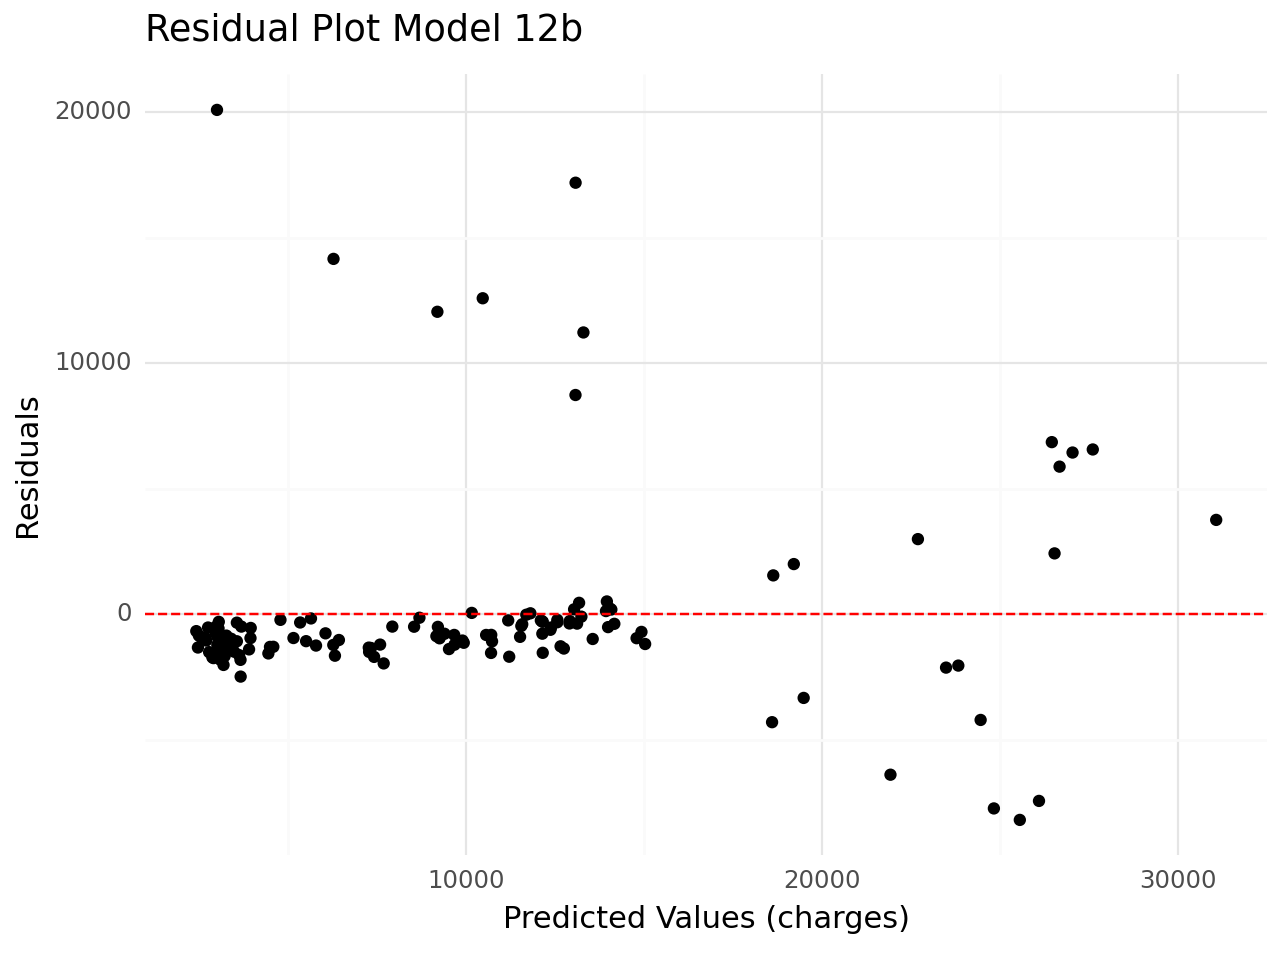

<Figure Size: (640 x 480)>

In [56]:
# Calculate residuals
residuals = y_2 - y_pred_model12b

# Create a DataFrame with residuals
residual_data2 = pd.DataFrame({'Predicted Values (charges)': y_pred_model12b, 'Residuals': residuals})

# Create the residual plot using ggplot
(ggplot(residual_data2, aes(x="Predicted Values (charges)", y="Residuals"))
+ geom_point()
+ geom_hline(yintercept=0, linetype="dashed", color="red")
+ labs(x="Predicted Values (charges)", y="Residuals")
+ theme_minimal()
+ ggtitle("Residual Plot Model 12b")
)